In [2]:
import math
from matplotlib import pyplot as plt
import mylibrary
from ASRK_code import adaptive_step_rk
from ASRK_code import adaptive_step_rk_2var

Scenario 1 - Solution for a first-order ODE

In [3]:
def func(t,y):
    f = t**2 - 3*y/t
    return f

def soln_curve(t):
    f = (t**3)/6 + 1/(3*t**3)
    return f

0.1009388410967313         324.1152549954286
0.10187718565592332         315.2416634805305
0.10283321474688781         306.5308598429408
0.10380711547263877         297.9840969498626
0.10479939800501392         289.599700863867
0.1058105800603291         281.376098929142
0.10684120238571847         273.3116898535605
0.10789182549741541         265.4048798446528
0.1089630351224888         257.6540497428721
0.11005543568398042         250.0576115697436
0.11116965448752342         242.6139827526012
0.11230634610989504         235.32156480910933
0.11346619222176742         228.17875498644474
0.114649899426551         221.18396744868818
0.11585820615965002         214.33559956216024
0.11709187893695748         207.6320631897875
0.11835171529787657         201.07177500858208
0.11963855242154939         194.65312164258773
0.12095325680247336         188.37452258030714
0.12229673531426394         182.23438270444885
0.12366993381989676         176.23110995418182
0.12507383635851044         170.

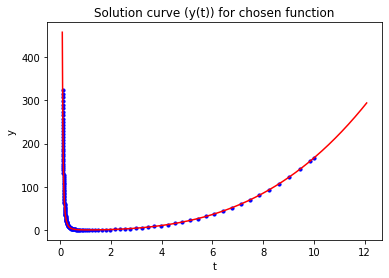

In [4]:
#y(0.1) is almost equal to 333.33
solution = adaptive_step_rk(0.1, 0.1, 10, 333.33, func, 0.00001)

for i in range(len(solution[0])):
    print(solution[0][i],'       ', solution[1][i])
print()

T_analytic = []
Y_analytic = []
t = 0.08

analytic_step = 0.01
for k in range(1200):
    t+=analytic_step
    T_analytic.append(t)
    Y_analytic.append(soln_curve(t))

plt.scatter(solution[0], solution[1], s=10, c='blue')
plt.plot(T_analytic, Y_analytic, c='red')
plt.title("Solution curve (y(t)) for chosen function")
plt.xlabel("t")
plt.ylabel("y")
plt.show()

Scenario 2 - The Earth Hole problem

In [5]:
#as described in the report, we define dy/dt (velocity)
def velocity(t, y):
    g = 9.81
    R = 6.37e6
    y0 = 6.37e6
    ydot = -y0*((g/R)**(1/2))*math.sin(t*(g/R)**(1/2))
    return ydot

#we also define a function (pos) for the solution curve to check our result's accuracy
def pos(t):
    g = 9.81
    R = 6.37e6
    y0 = 6.37e6
    y = y0*math.cos(t*(g/R)**(1/2))
    return y

t        y computed using dy/dt        Analytic solution for y
0         6370000.0         6370000.0
5.0         6369877.37539343         6369877.37539343
89.46827197684883         6330777.892847231         6330777.892567977
361.5782851936695         5739413.924001646         5739413.571036137
606.1744402125587         4651075.753613368         4651075.1255144905
834.5557306078124         3248397.0416064695         3248396.1868547285
1063.5048753916788         1582185.0570330357         1582183.9565473525
1283.3002897344795         -138558.75150928664         -138560.0494800084
1499.4071946706792         -1821135.9761110696         -1821137.4404972533
1716.0530569941084         -3377128.2078208653         -3377129.8134913584
1937.3766634569738         -4715421.920671047         -4715423.640641437
2168.8005490072023         -5735418.056651512         -5735419.850917738
2419.9969695948394         -6309066.487241295         -6309068.267762418
2718.837075154907         -6198706.627956109  

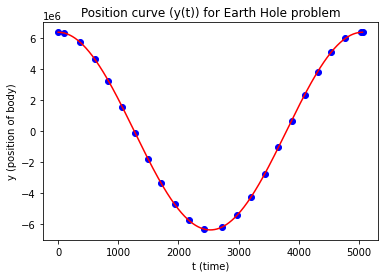

In [6]:
#here, the centre of the earth lies at y = 0
h_initial = 5
pos_initial = 6.37e6 #initial position of body
t_initial = 0
t_final = 5063
epsilon_e = 0.001

t_analytic = []
pos_analytic = []

position = adaptive_step_rk(h_initial, t_initial, t_final, pos_initial, velocity, epsilon_e)
print('t       ', 'y computed using dy/dt', '       Analytic solution for y')
print(t_initial,'       ', pos_initial,'       ', pos(0))
for i in range(len(position[0])):
    print(position[0][i],'       ', position[1][i],'       ', pos(position[0][i]))
print()

t = 0
analytic_step = 5063/10000
for k in range(10000):
    t+=analytic_step
    t_analytic.append(t)
    pos_analytic.append(pos(t))

plt.plot(t_analytic, pos_analytic, 'r-')
plt.scatter(position[0], position[1], c='blue')
plt.title("Position curve (y(t)) for Earth Hole problem")
plt.xlabel("t (time)")
plt.ylabel("y (position of body)")
plt.show()

Scenario 3 - Predator-Prey system

t        x(t)        y(t)
0.0         0.1         0.1
0.001         0.10000900040501216         0.09999100040498785
0.08392060244726812         0.1007581524159996         0.09924756709793567
5.508762259650299         0.16424783839294266         0.060928848585416875
10.726718247304479         0.26810782237565806         0.03939227730052953
14.82432606393768         0.3974277174243115         0.029185253749907675
18.462908534401485         0.5658081050699275         0.023439243344487923
22.084999607960366         0.8059140965793589         0.020028239578601146
25.376739607229226         1.1127174288980257         0.01878869242010516
28.366771664018277         1.4921109659957958         0.019432717108340505
31.11227283861409         1.9530801700905702         0.022243887703378387
33.659242916909065         2.505378814532538         0.02835531655137626
36.04399074826976         3.1586767963261217         0.040601807388336256
38.29840103926021         3.9213708176619853         0.0660542406

482.485735530051         6.157336950338941         0.00017754206063554025
484.30030263086456         7.382180328706622         0.00045258728675008755
486.02878249617913         8.774404680583482         0.0013635414760989019
487.29218263236135         9.954320711254525         0.0036407913366004914
488.09217394763334         10.780237255634125         0.007452541414097118
488.66330715753315         11.408997019525867         0.013028647821693082
489.11356533697915         11.927437864914204         0.020818301773524693
489.48624196438385         12.370730791221689         0.03128308836635546
489.80415812890277         12.757640396392445         0.0449061516563688
490.08121778659586         13.099736773615355         0.06219867608549004
490.32661003783574         13.40469547560142         0.08370120211432283
490.5710474012187         13.708318254410194         0.11334905486421643
490.7685556139199         13.950493790131816         0.14568874678603302
490.96547319866914         14.18716

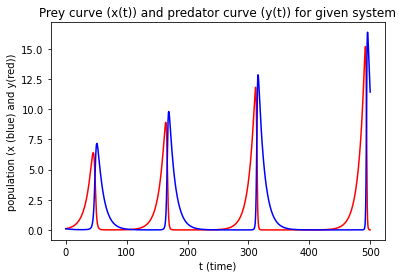

In [7]:
def prey_rate(t, x, y):
    a = 0.1 #birth rate for rabbits
    alpha = 0.1
    xdot = a*x - alpha*x*y
    return xdot
    
def pred_rate(t, x, y):
    c = 0.1 #death rate for foxes
    gamma = 0.1
    ydot = -c*y + gamma*x*y
    return ydot

h_initial = 0.001
x0 = 0.1
y0 = 0.1
t_initial = 0.0
t_final = 500.0
epsilon_pp = 0.000001

population = adaptive_step_rk_2var(h_initial, t_initial, t_final, x0, y0, prey_rate, pred_rate, epsilon_pp)

print('t       ', 'x(t)', '       y(t)')
print(t_initial,'       ', x0,'       ', y0)
for i in range(len(population[0])):
    print(population[0][i],'       ', population[1][i],'       ', population[2][i])
print()

plt.plot(population[0], population[1], 'r-')
plt.plot(population[0], population[2], 'b-')
plt.title("Prey curve (x(t)) and predator curve (y(t)) for given system")
plt.xlabel("t (time)")
plt.ylabel("population (x (blue) and y(red))")
plt.show()

t        x(t)        y(t)
0.0         0.1         0.1
0.001         0.1000290042054065         0.09998100180488569
0.08392060244726812         0.10246356974099385         0.09841817694273576
1.3434737222066906         0.14767004217835727         0.07749544274038209
2.638665248199603         0.21561717991799625         0.06096532769274588
3.8118605019968976         0.30439109176640466         0.04944997651407297
4.8677600023795895         0.41565831840319584         0.04134378003454537
5.828306631323119         0.5522812975326588         0.03550730465079128
6.7112829430200565         0.7175309277160441         0.031246527550017108
7.52975831725169         0.9148881633300472         0.02813294462083399
8.29352662047306         1.1480086100829339         0.02589536221165159
9.010158601116705         1.420718876821599         0.024361583833587903
9.685663936810485         1.7370169136005524         0.023426707307088228
10.324916945725041         2.1010721796584093         0.023036166478751

124.65519367176937         1.0223581422783878         0.0020137964022137887
125.38671957457348         1.273059061237266         0.0018748050129082361
126.0756038070158         1.5651147324162853         0.0017832309250560344
126.7268488962798         1.902591228849704         0.0017334352891852625
127.3445904901321         2.289726418863795         0.0017230359307360546
127.93229325064931         2.7309295736197803         0.0017526257860127994
128.49289312087808         3.230780928516033         0.001825932864530234
129.0289030814768         3.7940311965319315         0.0019504538716320539
129.5424933788294         4.4256010014225335         0.002138707786836954
130.03555351873592         5.130580162281462         0.0024104140791053096
130.50974102623766         5.9142266952832         0.002796159355375176
130.96652052404272         6.781965283830997         0.003343575770135279
131.40719576161587         7.739384724836822         0.004127907099251743
131.8329367012183         8.7922

208.89253490339917         2.7786408277360444         37.39762440568359
208.91679543504773         2.5561735302971664         37.46833618448774
208.94147297589575         2.3477373660026344         37.51979676394516
208.96660248804233         2.1526625442822738         37.55259765654325
208.99222034680153         1.9703064788465992         37.567286927226675
209.01836457726986         1.8000520529358675         37.56437063836916
209.04507510732347         1.6413060655863212         37.544313932491924
209.07239404026657         1.493497844097102         37.507541770101454
209.10036595105714         1.3560780055748178         37.45443933704995
209.1290382122994         1.2285173438847288         37.38535212711443
209.1584613530178         1.1103058398019674         37.30058570499955
209.1886894608311         1.0009517621617516         37.20040513605105
209.21978063137533         0.8999808668531011         37.08503407634238
209.2517974766263         0.8069356725015728         36.954653496

331.1195294683366         2.502240332415209e-05         0.011419838220430033
334.01160062650325         5.9386864785024166e-05         0.006402646461848835
337.2869415599337         0.00015829769264615718         0.0033240099991109755
341.0501344795291         0.0004887462932468876         0.0015643217116272066
345.45178604223474         0.0018273447896309544         0.0006468245602880793
349.5535494271739         0.0062493960876278155         0.0002844449689269676
352.3272046979149         0.014360737250638824         0.00016358993293254487
354.4649691950077         0.027270610162533196         0.00010700132914632447
356.2480172592813         0.04655885354437474         7.526993242569491e-05
357.78929179051033         0.07392831113724474         5.570089507475391e-05
359.1512793363911         0.11123996073293398         4.284825897864658e-05
360.50562469476625         0.16699978413622296         3.317708331726916e-05
361.6052780625451         0.2322668980382596         2.7120563948406

481.4210957245159         47.61515888132613         0.3765562671094762
481.4517315131023         47.999389937363674         0.43303266784593764
481.48092368889763         48.360426131067236         0.49526622187529534
481.5088045176531         48.69932855908078         0.5636041734668034
481.5354894884883         49.01697946904977         0.6384026750798423
481.5610800898075         49.31410903487778         0.7200268759050389
481.58566603157925         49.591316908245425         0.8088510250960265
481.60932704229805         49.84908972748282         0.9052585895926104
481.632134335566         50.08781546281713         1.009642387242771
481.6541518175296         50.30779526073963         1.1224047374709396
481.675437087873         50.50925327864779         1.2439576254728542
481.69604227789614         50.692344919602434         1.3747228938790454
481.71601475383545         50.857163729490416         1.5151324438982405
481.73539771312454         51.00374722100911         1.6656284611667

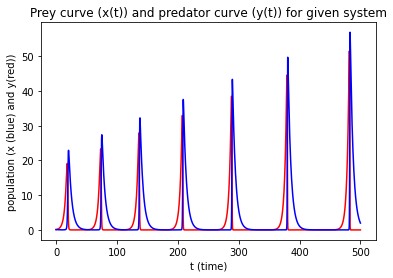

In [8]:
def prey_rate(t, x, y):
    a = 0.3 #birth rate for rabbits
    alpha = 0.1
    xdot = a*x - alpha*x*y
    return xdot
    
def pred_rate(t, x, y):
    c = 0.2 #death rate for foxes
    gamma = 0.1
    ydot = -c*y + gamma*x*y
    return ydot

h_initial = 0.001
x0 = 0.1
y0 = 0.1
t_initial = 0.0
t_final = 500.0
epsilon_pp = 0.000001

population = adaptive_step_rk_2var(h_initial, t_initial, t_final, x0, y0, prey_rate, pred_rate, epsilon_pp)

print('t       ', 'x(t)', '       y(t)')
print(t_initial,'       ', x0,'       ', y0)
for i in range(len(population[0])):
    print(population[0][i],'       ', population[1][i],'       ', population[2][i])
print()

plt.plot(population[0], population[1], 'r-')
plt.plot(population[0], population[2], 'b-')
plt.title("Prey curve (x(t)) and predator curve (y(t)) for given system")
plt.xlabel("t (time)")
plt.ylabel("population (x (blue) and y(red))")
plt.show()

t        x(t)        y(t)
0.0         0.1         0.1
0.001         0.10000900040501216         0.09997100420459355
0.0038460498941515417         0.10003462126605958         0.09988852698660083
0.011946049894151543         0.10010758213170014         0.09965416699818615
1.1450473095125777         0.11085951178890649         0.07174438164937731
2.366984015418666         0.12417485834050765         0.05040353019353399
3.6970082217058637         0.14089139995755018         0.03438251263665849
5.154630554715155         0.16218537869964753         0.022663669100220538
6.765749370640605         0.18984360026940478         0.014346388598569664
8.56471324325448         0.22667476835428402         0.008652560146592386
10.59856510022386         0.2773116337533998         0.004921437111459957
12.934153744528816         0.34986656334351907         0.002604607070539826
15.671153617432342         0.4596843069921198         0.0012598972399350044
18.96819114540835         0.6389527827640041         0.

171.056507445486         0.021428114922881172         0.0051412247519569505
173.17035653276363         0.026443286288933762         0.0027381407641491697
175.5912471960611         0.03366400259652916         0.0013318174461127879
178.41196938187284         0.0446175292577438         0.0005755816332630562
181.77127636104325         0.062418803810814         0.000211893104402225
185.8885519415737         0.09420866608515         6.173224072081573e-05
191.13833853702604         0.15924917062020366         1.18906835034728e-05
195.60311716667596         0.24887473050956938         3.236796471399275e-06
199.56598480262466         0.3699026104558854         1.0751012013342895e-06
203.50819888363392         0.5486524864008477         3.7793804595035044e-07
207.0777507765811         0.7840112604994296         1.5708702729553234e-07
210.2991516416696         1.081998922066757         7.686997524065579e-08
213.23452981654466         1.451139879012787         4.376832181890703e-08
215.93457696013

366.2069880108934         5.017911984394643         30.994042813309353
366.23200258295645         4.6552010025504975         31.150887599114412
366.25728560704164         4.313521069768404         31.2815225030082
366.28287713542716         3.9918687341061285         31.386852311587425
366.3088174838948         3.68929328235696         31.467712844145396
366.33514756029905         3.404891899758912         31.5248759091516
366.3619091852112         3.1378054620336093         31.559053407113
366.38914540788187         2.887214896281889         31.57090069059621
366.4169008289134         2.6523379731533367         31.561019288749343
366.4452219345532         2.432426483639298         31.529959056915974
366.4741574453103         2.226763771647732         31.47821980925451
366.5037586896535         2.034662536845237         31.406252478175706
366.53408000990373         1.8554628752987796         31.314459820476106
366.56517920247376         1.688530559832718         31.203196700586943
366.

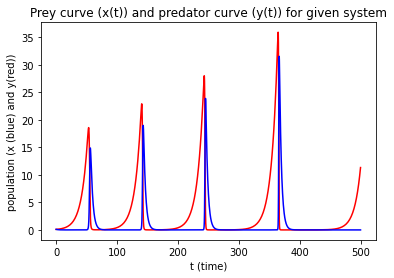

In [9]:
def prey_rate(t, x, y):
    a = 0.1 #birth rate for rabbits
    alpha = 0.1
    xdot = a*x - alpha*x*y
    return xdot
    
def pred_rate(t, x, y):
    c = 0.3 #death rate for foxes
    gamma = 0.1
    ydot = -c*y + gamma*x*y
    return ydot

h_initial = 0.001
x0 = 0.1
y0 = 0.1
t_initial = 0.0
t_final = 500.0
epsilon_pp = 0.000001

population = adaptive_step_rk_2var(h_initial, t_initial, t_final, x0, y0, prey_rate, pred_rate, epsilon_pp)

print('t       ', 'x(t)', '       y(t)')
print(t_initial,'       ', x0,'       ', y0)
for i in range(len(population[0])):
    print(population[0][i],'       ', population[1][i],'       ', population[2][i])
print()

plt.plot(population[0], population[1], 'r-')
plt.plot(population[0], population[2], 'b-')
plt.title("Prey curve (x(t)) and predator curve (y(t)) for given system")
plt.xlabel("t (time)")
plt.ylabel("population (x (blue) and y(red))")
plt.show()